# RNN

## 数据准备

In [1]:
import pandas as pd
from random import random
import numpy as np
% matplotlib inline

In [2]:
seq_data = (list(range(1, 10, 1)) + list(range(10, 1, -1))) * 1000
pdata = pd.DataFrame(columns=['a', 'b'])
pdata['a'] = seq_data
pdata['b'] = pdata['a'].shift(9)
all_data = pdata.iloc[10:] * random()

all_data.head()

,a,b
10,3.234112,0.718692
11,2.874766,1.078037
12,2.515420,1.437383
13,2.156075,1.796729
14,1.796729,2.156075


In [3]:
def load_data(df_data, n_prev=100):
    """
        加载数据
    """
    X_list = []
    y_list = []
    for i in range(len(df_data) - n_prev):
        X_list.append(df_data.iloc[i: i+n_prev].values)
        y_list.append(df_data.iloc[i+n_prev].values)
        
    X = np.array(X_list)
    y = np.array(y_list)
    
    return X, y
    
def prepare_data(df_data, test_size=0.3):
    """
        准备训练数据集和测试数据集
    """
    n_train = round(len(df_data) * (1 - test_size))
    
    X_train, y_train = load_data(df_data.iloc[: n_train])
    X_test, y_test = load_data(df_data.iloc[n_train:])
    
    return X_train, y_train, X_test, y_test

In [4]:
X_train, y_train, X_test, y_test = prepare_data(all_data)

In [5]:
print(X_train.shape)
print(y_train.shape)

(12493, 100, 2)
(12493, 2)


In [6]:
print(X_test.shape)
print(y_test.shape)

(5297, 100, 2)
(5297, 2)


## 建立模型

In [7]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import SimpleRNN, LSTM

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
in_out_neurons = 2
hidden_neurons = 300

### RNN

In [9]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=hidden_neurons, input_shape=(None, in_out_neurons)))
rnn_model.add(Dense(units=in_out_neurons, input_dim=hidden_neurons))
rnn_model.add(Activation('linear'))
rnn_model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [10]:
rnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 300)               90900     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 602       
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 91,502
Trainable params: 91,502
Non-trainable params: 0
_________________________________________________________________


In [11]:
rnn_model.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
12493/12493 [==============================] - 11s 856us/step - loss: 0.2487
Epoch 2/10
12493/12493 [==============================] - 10s 792us/step - loss: 0.1431
Epoch 3/10
12493/12493 [==============================] - 10s 794us/step - loss: 0.0451
Epoch 4/10
12493/12493 [==============================] - 10s 779us/step - loss: 0.0356
Epoch 5/10
12493/12493 [==============================] - 9s 758us/step - loss: 0.0203
Epoch 6/10
12493/12493 [==============================] - 10s 784us/step - loss: 0.0519
Epoch 7/10
12493/12493 [==============================] - 10s 830us/step - loss: 0.2237
Epoch 8/10
12493/12493 [==============================] - 11s 890us/step - loss: 0.1978
Epoch 9/10
12493/12493 [==============================] - 12s 929us/step - loss: 0.0684
Epoch 10/10
12493/12493 [==============================] - 10s 807us/step - loss: 0.0438


### LSTM

In [15]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=hidden_neurons, input_shape=(None, in_out_neurons)))
lstm_model.add(Dense(units=in_out_neurons, input_dim=hidden_neurons))
lstm_model.add(Activation('linear'))
lstm_model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [13]:
lstm_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 300)               363600    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 602       
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 364,202
Trainable params: 364,202
Non-trainable params: 0
_________________________________________________________________


In [14]:
lstm_model.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
12493/12493 [==============================] - 52s 4ms/step - loss: 0.2998
Epoch 2/10
12493/12493 [==============================] - 58s 5ms/step - loss: 0.0405
Epoch 3/10
12493/12493 [==============================] - 48s 4ms/step - loss: 0.0220
Epoch 4/10
12493/12493 [==============================] - 50s 4ms/step - loss: 0.0144
Epoch 5/10
12493/12493 [==============================] - 44s 4ms/step - loss: 0.0110
Epoch 6/10
12493/12493 [==============================] - 48s 4ms/step - loss: 0.0084
Epoch 7/10
12493/12493 [==============================] - 44s 3ms/step - loss: 0.0067
Epoch 8/10
12493/12493 [==============================] - 43s 3ms/step - loss: 0.0052
Epoch 9/10
12493/12493 [==============================] - 45s 4ms/step - loss: 0.0042
Epoch 10/10
12493/12493 [==============================] - 45s 4ms/step - loss: 0.0037


## 结果比较

In [16]:
from sklearn.metrics import mean_squared_error

y_pred_rnn = rnn_model.predict(X_test)
y_pred_lstm = lstm_model.predict(X_test)
print('RNN mse:', mean_squared_error(y_test, y_pred_rnn))
print('LSTM mse:', mean_squared_error(y_test, y_pred_lstm))

RNN mse: 0.04509420836905755
LSTM mse: 4.365624771438116


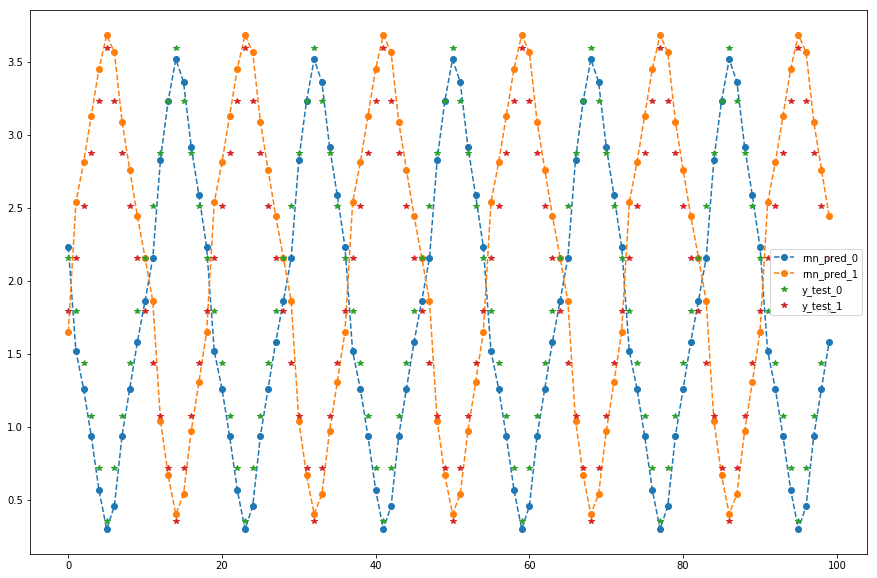

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.plot(y_pred_rnn[:100, 0], '--o', label='rnn_pred_0')
plt.plot(y_pred_rnn[:100, 1], '--o', label='rnn_pred_1')

plt.plot(y_test[:100, 0], '*', label='y_test_0')
plt.plot(y_test[:100, 1], '*', label='y_test_1')

plt.legend(loc='best')

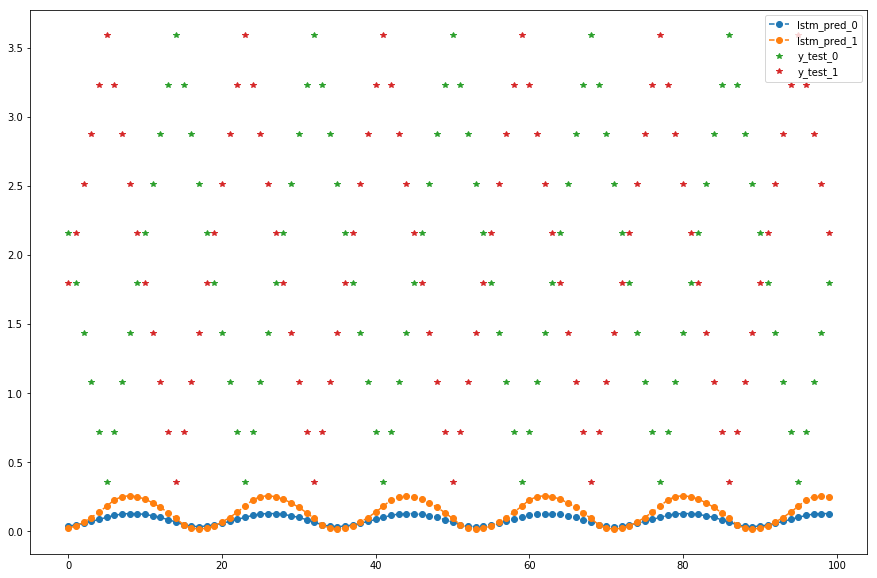

In [18]:
plt.figure(figsize=(15, 10))

plt.plot(y_pred_lstm[:100, 0], '--o', label='lstm_pred_0')
plt.plot(y_pred_lstm[:100, 1], '--o', label='lstm_pred_1')

plt.plot(y_test[:100, 0], '*', label='y_test_0')
plt.plot(y_test[:100, 1], '*', label='y_test_1')

plt.legend(loc='best')